In [26]:
from pathlib import Path
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ROOT_DIR = Path('/home/rob/PycharmProjects/objectDetection')
DATA_DIR = ROOT_DIR /'data'

## Load an image

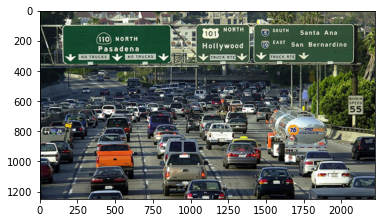

In [19]:
traffic_image = cv2.imread(str(DATA_DIR / 'images' / 'trafficheader.jpg'))
traffic_image = traffic_image[:,:,::-1]
plt.imshow(traffic_image)
plt.show()

## Convert to grayscale

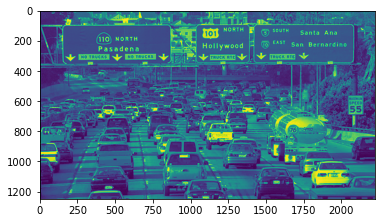

In [23]:
g_traffic_image = cv2.cvtColor(traffic_image, cv2.COLOR_BGR2GRAY)
plt.imshow(g_traffic_image)
plt.show()

## Resize the image

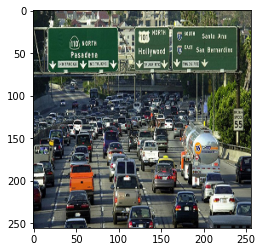

In [17]:
r_traffic_image = cv2.resize(traffic_image, (256,256))
plt.imshow(r_traffic_image)
plt.show()

## Draw bounding box

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


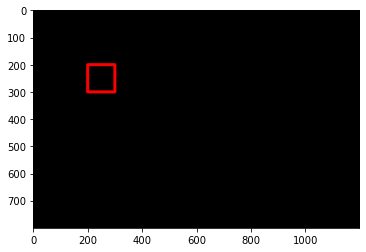

In [33]:
img = np.zeros((800,1200, 3))
img = cv2.rectangle(img, 
                    (200,200), # Upper left corner (minX, minY)
                    (300,300), # Lower right corner (maxX, maxY)
                    (255,0,0), # Color in RGB
                    10) # Thickness
plt.imshow(img)
plt.show()

## Add text

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


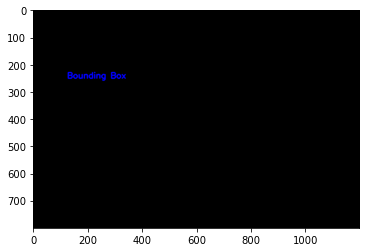

In [31]:
img = np.zeros((800,1200, 3))

font = cv2.FONT_HERSHEY_SIMPLEX 
cv2.putText(img, 'Bounding Box', (125,250), 
            font, 1, (0, 0, 255), 3, cv2.LINE_AA) 

plt.imshow(img)
plt.show()

## Accessing pixel values

In [39]:
px = traffic_image[100,100]

In [40]:
print(px)

[179 190 173]


In [41]:
blue = traffic_image[100,100, 0]

In [42]:
print(blue)

179


In [44]:
### Faster method:
### Accessing the RED value
traffic_image.item(10,10,2)

22

## Check image shape and if grayscale (tuple will only contain rows and columns)

In [47]:
print(traffic_image.shape)

(1248, 2220, 3)


In [48]:
print(traffic_image.dtype)

uint8


In [49]:
## Splitting and Merging Image Channels

In [51]:
b,g,r = cv2.split(traffic_image)
traffic_image = cv2.merge((b,g,r))

In [53]:
b = img[:,:,0]

In [54]:
b

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
img[:,:,2] = 0

## Image Blending

In [74]:
img1 = cv2.imread(str(DATA_DIR / 'images' / 'trafficheader.jpg'))[:,:,::-1]
img1 = cv2.resize(img1, (1200,800))
img2 = cv2.imread(str(DATA_DIR / 'images' / 'lamborghini.jpg'))[:,:,::-1]
img2 = cv2.resize(img2, (1200,800))    

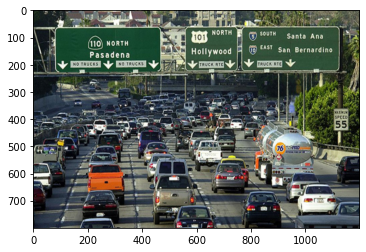

In [76]:
plt.imshow(img1)
plt.show()

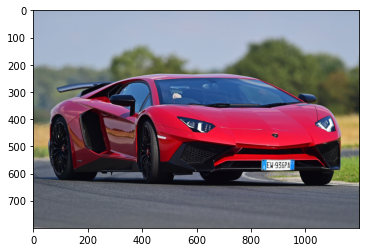

In [77]:
plt.imshow(img2)
plt.show()

In [80]:
dst = cv2.addWeighted(img1,0.7,img2,0.4,0)

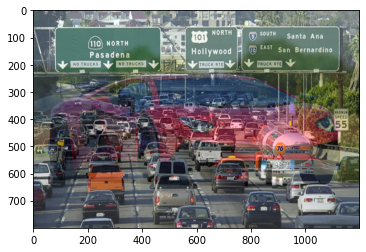

In [82]:
plt.imshow(dst)
plt.show()

## Perform Bitwise Operations

Put the lambo in the top-left corner.

In [91]:
img1 = cv2.imread(str(DATA_DIR / 'images' / 'trafficheader.jpg'))[:,:,::-1]
img2 = cv2.imread(str(DATA_DIR / 'images' / 'lamborghini.jpg'))[:,:,::-1]
img2 = cv2.resize(img2, (1200,800))    

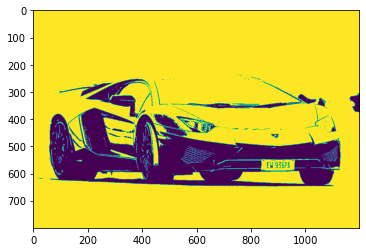

In [118]:
## Create a a ROI

rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

## Create a mask of logo and create its inverse mask also

img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 50, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of lambo in ROI
img1_bg = cv2.bitwise_and(roi,roi, mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2, img2, mask = mask)

# Put lambo in ROI and modify the main image
dst = cv2.add(img1_bg, img2_fg)
img1[0:rows, 0:cols] = dst

plt.imshow(mask)
#plt.imshow(img1)

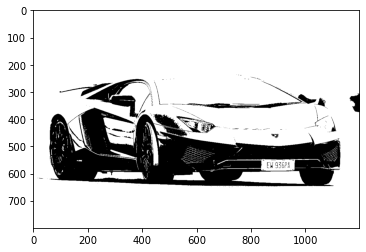

In [120]:
ret, mask = cv2.threshold(img2gray, 50, 255, cv2.THRESH_BINARY)
plt.imshow(mask, cmap='gray', vmin=0, vmax=255)

## Optimize image processing

In [121]:
# Measure performance
img1 = cv2.imread(str(DATA_DIR / 'images' / 'trafficheader.jpg'))[:,:,::-1]

e1 = cv2.getTickCount()
for i in range(5, 49, 2): 
    img1 =cv2.medianBlur(img1, i)
e2 = cv2.getTickCount()
t = (e2-e1)/cv2.getTickFrequency()
print(t)

3.325579961


In [122]:
cv2.useOptimized()

True

In [124]:
%timeit res = cv2.medianBlur(img1,49)

143 ms ± 2.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [125]:
cv2.setUseOptimized(False)
cv2.useOptimized()

False

In [128]:
%timeit res = cv2.medianBlur(img1,49)

142 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
